In [1]:
import sys
sys.path.append('../../../Scripts/')

In [ ]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np

In [3]:
path = '../Data/'

## Data

In [4]:
train = pd.read_csv(f'{path}aspect_train.csv')
test = pd.read_csv(f'{path}aspect_test.csv')

## Preprocessing

In [5]:
prep = tp.Preprocessing('english')

In [6]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

In [7]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [9]:
target_names = ['self', 'future', 'world']

seed = 42

### Logistic Regression

Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.95


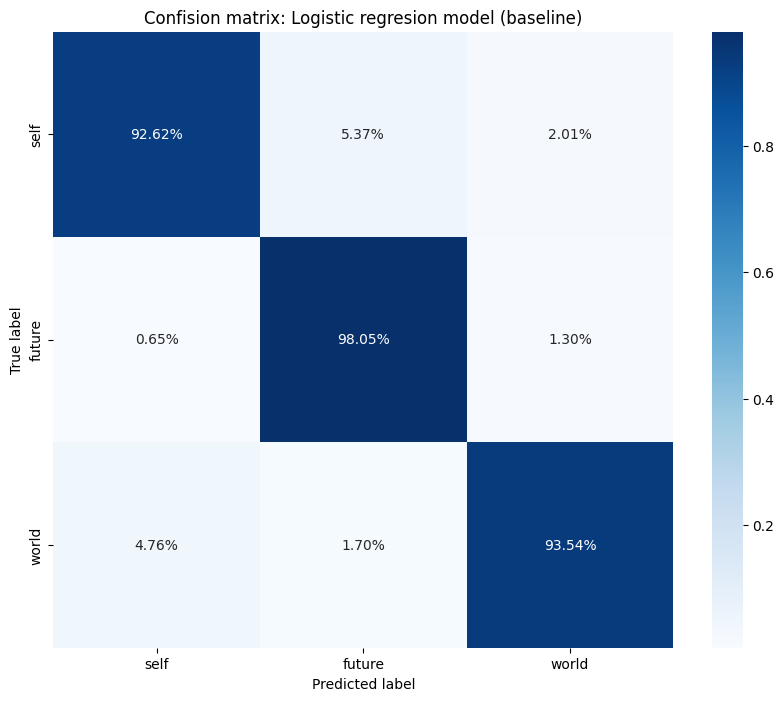

In [10]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='Confision matrix: Logistic regresion model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [11]:
print(metrics_lr[0])

              precision    recall  f1-score   support

        self       0.95      0.93      0.94       298
      future       0.93      0.98      0.96       308
       world       0.96      0.94      0.95       294

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.95


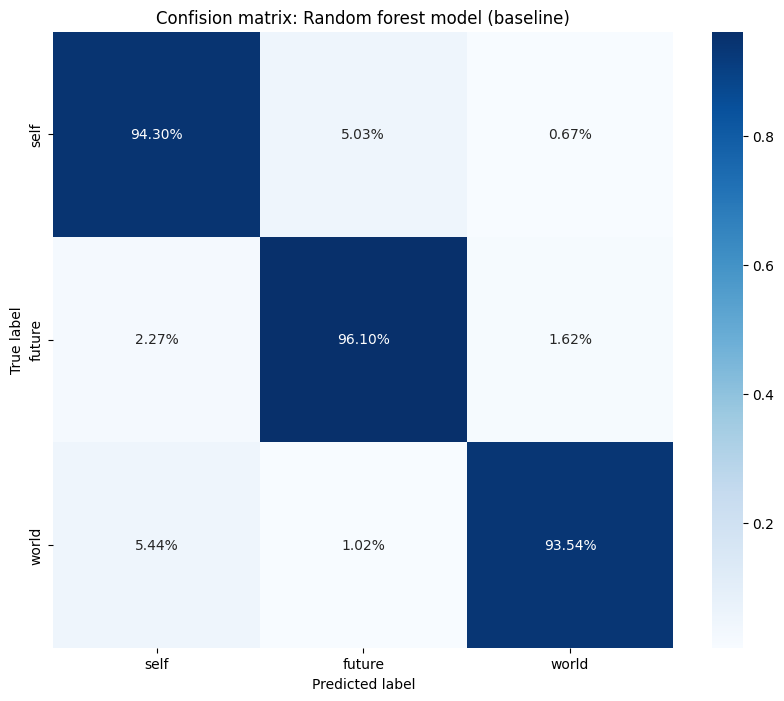

In [12]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='Confision matrix: Random forest model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [13]:
print(metrics_rf[0])

              precision    recall  f1-score   support

        self       0.92      0.94      0.93       298
      future       0.94      0.96      0.95       308
       world       0.98      0.94      0.95       294

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.93


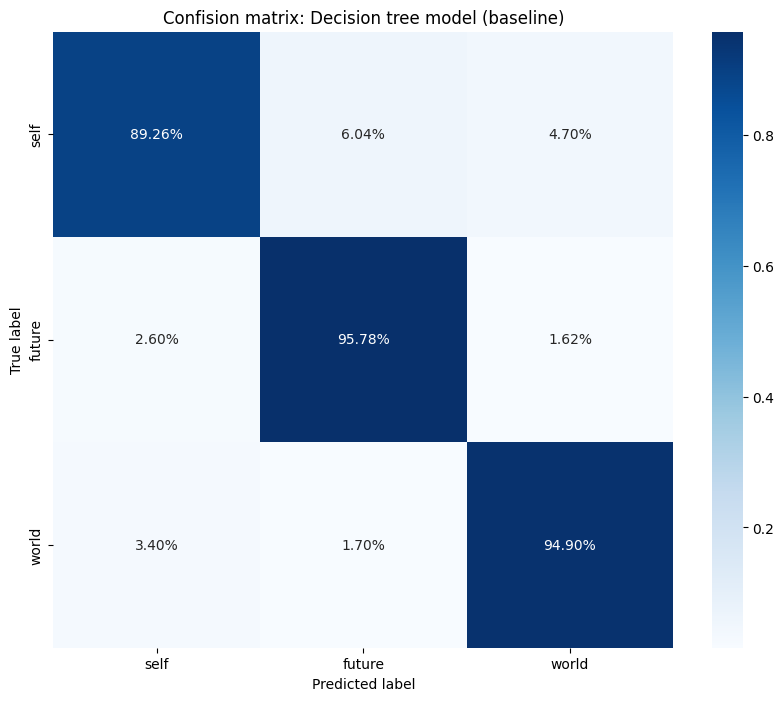

In [14]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='Confision matrix: Decision tree model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [15]:
print(metrics_dt[0])

              precision    recall  f1-score   support

        self       0.94      0.89      0.91       298
      future       0.93      0.96      0.94       308
       world       0.94      0.95      0.94       294

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.95


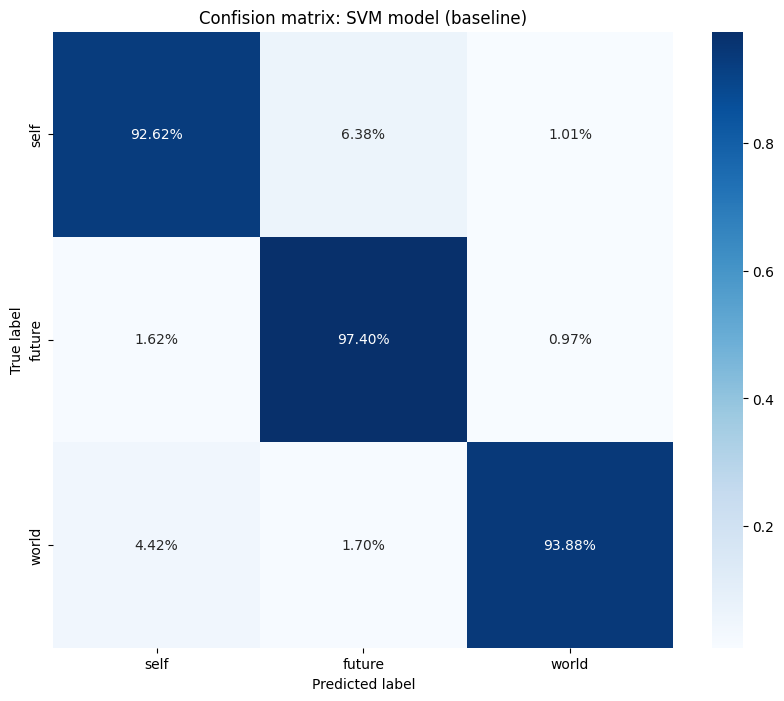

In [16]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='Confision matrix: SVM model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [17]:
print(metrics_svm[0])

              precision    recall  f1-score   support

        self       0.94      0.93      0.93       298
      future       0.93      0.97      0.95       308
       world       0.98      0.94      0.96       294

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

